# setup

In [1]:
%load_ext autoreload
%autoreload 2

In [48]:
import os
import re
import pickle
from typing import Sequence, List
from tempfile import mkdtemp

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

from src.io import CsvDataLoader, PickleLoader
from src.preproc import RawDataCleaner, TextCleaner, SimpleTokenizer

pd.set_option('display.max_rows', 100)

# load raw data & preprocess

In [114]:
pipe = Pipeline([
    ('load_data', CsvDataLoader(file_name='polish_sentiment_dataset.csv')),
    ('basic_cleaning', RawDataCleaner()),
    ('text_cleaning', TextCleaner()),
    ('tokenizer', SimpleTokenizer())
], memory=mkdtemp())

In [250]:
data = pipe.fit_transform(None)

/home/mic/Pulpit/pyProj/gensim/venv/lib/python3.8/site-packages/sklearn/pipeline.py:348: UserWarning: Persisting input arguments took 2.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
/home/mic/Pulpit/pyProj/gensim/venv/lib/python3.8/site-packages/sklearn/pipeline.py:348: UserWarning: Persisting input arguments took 2.30s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they

In [ ]:
with open('./data/data_preproc.pkl', 'wb') as f:
    pickle.dump(data, f)

# basic eda

In [140]:
data.shape

(917525, 8)

In [141]:
data['negative'].value_counts(dropna=False)/len(data)

0.0    0.800228
1.0    0.199772
Name: negative, dtype: float64

<AxesSubplot:ylabel='Frequency'>

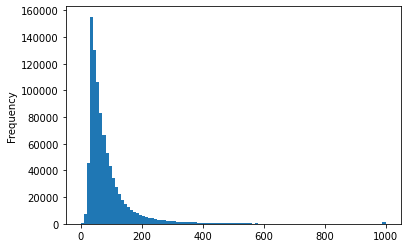

In [58]:
data['len'].clip(upper=1000).plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

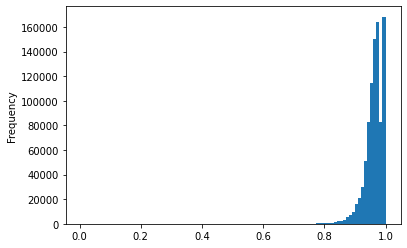

In [61]:
data['len_clean_ratio'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

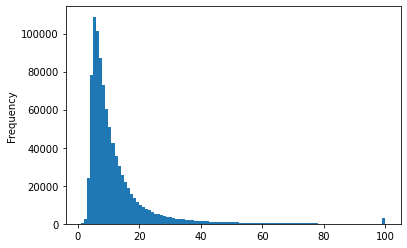

In [219]:
data['tokens_len'].clip(upper=100).plot.hist(bins=100)

## token length

In [ ]:
tokens_len = [(i, len(tok)) for i, toks in enumerate(data['tokens']) for tok in toks]
tokens_len = pd.DataFrame(tokens_len, columns=['row', 'tok_len'])

In [286]:
print(f"words in data: {len(tokens_len)}")

words in data: 12083288


<AxesSubplot:ylabel='Frequency'>

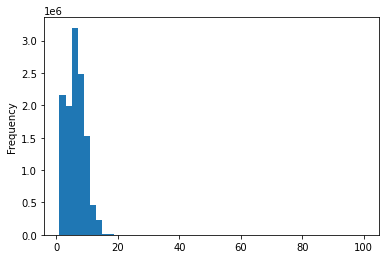

In [256]:
tokens_len['tok_len'].clip(upper=100).plot.hist(bins=50)

In [257]:
tokens_len['tok_len'].describe()

count    1.208329e+07
mean     5.755617e+00
std      4.244786e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      8.000000e+00
max      9.982000e+03
Name: tok_len, dtype: float64

In [258]:
max(tokens_len['tok_len'])

9982

In [271]:
tokens_len[tokens_len['tok_len']==50]

,row,tok_len
9940205,774921,50
10279304,812174,50
11840864,907920,50


In [261]:
data.index

RangeIndex(start=0, stop=917525, step=1)

In [274]:
data['desc_clean'][774921]

'xdxdxdxdxdxxxxxxxxxxxxxddddddddddddddxxxxxxxxxddxx'

# adhoc eda

In [275]:
data

,desc,len,negative,desc_clean,len_clean,len_clean_ratio,tokens,tokens_len
0,Polecam nie pierwszy i nie ostatni raz!,39,0.0,polecam nie pierwszy i nie ostatni raz,38,0.974359,"[polecam, nie, pierwszy, i, nie, ostatni, raz]",7
1,Bardzo dobra komunikacja sms i telefoniczna. Z...,121,0.0,bardzo dobra komunikacja sms i telefoniczna za...,117,0.966942,"[bardzo, dobra, komunikacja, sms, i, telefonic...",16
2,Polecam zakupy w tym sklepie. Są dostępne częś...,87,0.0,polecam zakupy w tym sklepie są dostępne częśc...,84,0.965517,"[polecam, zakupy, w, tym, sklepie, są, dostępn...",14
3,Jestem w pełni zadowolona z przebiegu transakcji,48,0.0,jestem w pełni zadowolona z przebiegu transakcji,48,1.000000,"[jestem, w, pełni, zadowolona, z, przebiegu, t...",7
4,Transakcja przebiegła błyskawicznie. Pełen pro...,86,0.0,transakcja przebiegła błyskawicznie pełen prof...,84,0.976744,"[transakcja, przebiegła, błyskawicznie, pełen,...",9
...,...,...,...,...,...,...,...,...
917520,Coraz lepiej wygląda,20,1.0,coraz lepiej wygląda,20,1.000000,"[coraz, lepiej, wygląda]",3
917521,JA SRAM NA TEN PIERSCIONEK I NA CIEBIE CHWILE ...,89,1.0,ja sram na ten pierscionek i na ciebie chwile ...,89,1.000000,"[ja, sram, na, ten, pierscionek, i, na, ciebie...",17
917522,Rafatus do Marleny Ty kurwo bez honoru ...,126,1.0,rafatus do marleny ty kurwo bez honoru kto tu ...,91,0.722222,"[rafatus, do, marleny, ty, kurwo, bez, honoru,...",16
917523,matka Marleny prosi o pomoc,29,1.0,matka marleny prosi o pomoc,27,0.931034,"[matka, marleny, prosi, o, pomoc]",5


## lettes dict

In [8]:
from collections import Counter

def count_chars(s, chars):
    counter = Counter(s)
    return {c : counter.get(c,0) for c in chars}

letters_dict = Counter([c for s in data['desc'] for c in s])

In [9]:
sorted(letters_dict.items(), key=lambda i: i[1], reverse=True)

[(' ', 11269150),
 ('a', 6918402),
 ('e', 5827493),
 ('o', 5432923),
 ('i', 4519406),
 ('z', 4060100),
 ('n', 3448487),
 ('s', 3133460),
 ('r', 2971734),
 ('k', 2774425),
 ('y', 2761594),
 ('w', 2572928),
 ('t', 2412194),
 ('p', 2306489),
 ('m', 2204999),
 ('c', 2117288),
 ('d', 2068713),
 ('l', 1826311),
 ('b', 1633695),
 ('u', 1422661),
 ('j', 1374134),
 ('.', 1076430),
 ('ł', 1008407),
 (',', 807210),
 ('g', 713406),
 ('ó', 465146),
 ('ę', 448375),
 ('ż', 416814),
 ('P', 367068),
 ('ą', 360837),
 ('h', 338778),
 ('S', 288760),
 ('!', 278291),
 ('ś', 273548),
 ('f', 228596),
 ('\r', 219740),
 ('ć', 212443),
 ('B', 174693),
 ('A', 170350),
 ('W', 166578),
 ('O', 155386),
 ('D', 154107),
 ('T', 147638),
 ('Z', 133755),
 ('J', 133418),
 ('E', 132228),
 ('N', 122486),
 ('K', 104327),
 ('\n', 104190),
 ('M', 102931),
 (')', 99456),
 ('C', 95883),
 ('I', 91000),
 ('-', 84443),
 ('0', 83453),
 ('R', 82176),
 (':', 75159),
 ('L', 61472),
 ('ń', 60901),
 ('1', 58551),
 ('G', 48068),
 ('Y', 40

In [ ]:
# todo: \r, \n, \xa0 to space

## filter alpha num and punctuation

In [22]:
a = '257 najlepszy moment ψψ'
b = 'اغلاق الكلبة العربي يمارس الجنس مع ما يصل'
c = "stara ''sowiecka szkola'' zaczynam sie zastanawiac czy mozna by ich legalnie zdelegalizowac ?"
d = 'Dobrze. Szkoda, że InPost nie precyzuje co oznacza, że dostarcza przesyłkę "OD RANA"'
e = '  asd  asd  '
f = 'łączńie ćma grzegżźółka'
g = 'Bardzo przyjazny klientom sklep. \\Realizuje, wszystkie zamówienai: takie - takie '
h = 'Szanowni Państwo, ODRADZAM !!!\r\r\r\n\r\r\r\n'
i = 'Szanowni Państwo,\r\r\r\n\r\r\r\n ODRADZAM !!!'
j = 'what???????!!!!!!!!!'

tt = [a,b,c,d,e,f,g,h,i,j]

In [25]:


for s in tt:
    c = re.sub(special, ' ', s)
    c = re.sub(alpha, '', c)
    c = re.sub('\s+', ' ', c)
    c = c.strip()
    print(f"len: {len(c)}|{c}|")

len: 20|257 najlepszy moment|
len: 0||
len: 93|stara ''sowiecka szkola'' zaczynam sie zastanawiac czy mozna by ich legalnie zdelegalizowac ?|
len: 84|Dobrze. Szkoda, że InPost nie precyzuje co oznacza, że dostarcza przesyłkę "OD RANA"|
len: 7|asd asd|
len: 23|łączńie ćma grzegżźółka|
len: 78|Bardzo przyjazny klientom sklep. Realizuje, wszystkie zamówienai takie - takie|
len: 30|Szanowni Państwo, ODRADZAM !!!|
len: 30|Szanowni Państwo, ODRADZAM !!!|
len: 20|what???????!!!!!!!!!|


# load preprocessed pickle

In [3]:
df_prepro = PickleLoader().load()

In [4]:
df_prepro.shape

(917525, 8)

In [5]:
type(df_prepro)

pandas.core.frame.DataFrame

In [6]:
df_prepro.head()

,desc,len,negative,desc_clean,len_clean,len_clean_ratio,tokens,tokens_len
0,Polecam nie pierwszy i nie ostatni raz!,39,0.0,polecam nie pierwszy i nie ostatni raz,38,0.974359,"[polecam, nie, pierwszy, i, nie, ostatni, raz]",7
1,Bardzo dobra komunikacja sms i telefoniczna. Z...,121,0.0,bardzo dobra komunikacja sms i telefoniczna za...,117,0.966942,"[bardzo, dobra, komunikacja, sms, i, telefonic...",16
2,Polecam zakupy w tym sklepie. Są dostępne częś...,87,0.0,polecam zakupy w tym sklepie są dostępne częśc...,84,0.965517,"[polecam, zakupy, w, tym, sklepie, są, dostępn...",14
3,Jestem w pełni zadowolona z przebiegu transakcji,48,0.0,jestem w pełni zadowolona z przebiegu transakcji,48,1.000000,"[jestem, w, pełni, zadowolona, z, przebiegu, t...",7
4,Transakcja przebiegła błyskawicznie. Pełen pro...,86,0.0,transakcja przebiegła błyskawicznie pełen prof...,84,0.976744,"[transakcja, przebiegła, błyskawicznie, pełen,...",9


In [9]:
df_prepro['negative'].value_counts(dropna=False)

0.0    734229
1.0    183296
Name: negative, dtype: int64

In [8]:
df_prepro['negative'].value_counts(dropna=False)/len(df_prepro)

0.0    0.800228
1.0    0.199772
Name: negative, dtype: float64

# modeling

## creating dictionaty

In [289]:
import gensim
from gensim import corpora, models

In [276]:
# Create dictionary
dictionary = corpora.Dictionary(data['tokens'])

In [319]:
print(f"unique tokens count: {len(dictionary)}")

unique tokens count: 260521


In [287]:
corpus = [dictionary.doc2bow(tokens) for tokens in data['tokens']]
tfidf = models.TfidfModel(corpus, smartirs='ntc')

In [294]:
corpus[0]

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1)]

In [310]:
tfidf[corpus][0]

[(0, 0.11502465340007656),
 (1, 0.4447199823065697),
 (2, 0.6162766796694312),
 (3, 0.49247428983038594),
 (4, 0.11888695562762791),
 (5, 0.3905527956380666)]

In [315]:
[(dictionary[tok_id], tok_freq) for tok_id, tok_freq in tfidf[corpus][0]]

[('i', 0.11502465340007656),
 ('nie', 0.4447199823065697),
 ('ostatni', 0.6162766796694312),
 ('pierwszy', 0.49247428983038594),
 ('polecam', 0.11888695562762791),
 ('raz', 0.3905527956380666)]

In [316]:
[(dictionary[tok_id], tok_freq) for tok_id, tok_freq in tfidf[corpus][1]]

[('i', 0.060944159953105696),
 ('polecam', 0.06299054529559758),
 ('bardzo', 0.08280210917801677),
 ('dobra', 0.20322288487180415),
 ('dobrze', 0.19508840777884015),
 ('komunikacja', 0.3317832424818046),
 ('sklep', 0.11649578839171103),
 ('sms', 0.3497153161337092),
 ('telefoniczna', 0.39583410968622923),
 ('ten', 0.20909075076732328),
 ('terminie', 0.3069124397146287),
 ('towar', 0.1416645550082417),
 ('w', 0.07953541854259781),
 ('wysłany', 0.3676203764967229),
 ('zabezpieczony', 0.3259806243987228),
 ('zamówiony', 0.31264824437629013)]

## w2v

In [3]:
with open('./data/data_preproc.pkl', 'rb') as f:
    data = pickle.load(f)

In [33]:
df_prepro.head()

,desc,len,negative,desc_clean,len_clean,len_clean_ratio,tokens,tokens_len
0,Polecam nie pierwszy i nie ostatni raz!,39,0.0,polecam nie pierwszy i nie ostatni raz,38,0.974359,"[polecam, nie, pierwszy, i, nie, ostatni, raz]",7
1,Bardzo dobra komunikacja sms i telefoniczna. Z...,121,0.0,bardzo dobra komunikacja sms i telefoniczna za...,117,0.966942,"[bardzo, dobra, komunikacja, sms, i, telefonic...",16
2,Polecam zakupy w tym sklepie. Są dostępne częś...,87,0.0,polecam zakupy w tym sklepie są dostępne częśc...,84,0.965517,"[polecam, zakupy, w, tym, sklepie, są, dostępn...",14
3,Jestem w pełni zadowolona z przebiegu transakcji,48,0.0,jestem w pełni zadowolona z przebiegu transakcji,48,1.000000,"[jestem, w, pełni, zadowolona, z, przebiegu, t...",7
4,Transakcja przebiegła błyskawicznie. Pełen pro...,86,0.0,transakcja przebiegła błyskawicznie pełen prof...,84,0.976744,"[transakcja, przebiegła, błyskawicznie, pełen,...",9


In [11]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=df_prepro['tokens'], vector_size=25, window=5, min_count=1, workers=4)

In [ ]:
vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None

In [59]:
model.total_train_time

30.200581799999554

In [61]:
len(model.wv)

260521

In [12]:
model.save("./models/word2vec.model")

In [34]:
model.vector_size

25

In [66]:
def embedding(tokens: List[str], model: Word2Vec):
    default_vector = np.zeros(model.vector_size)
    vectorized = [model.wv[token] if model.wv.has_index_for(token) else default_vector for token in tokens]

    return sum(vectorized)

In [67]:
n = 1

tokens = df_prepro['tokens'][n]
embedded = embedding(tokens, model)

print(tokens)
print(embedded)

['bardzo', 'dobra', 'komunikacja', 'sms', 'i', 'telefoniczna', 'zamówiony', 'towar', 'wysłany', 'w', 'terminie', 'dobrze', 'zabezpieczony', 'polecam', 'ten', 'sklep']
[  4.8277154 -20.816854  -40.588875   25.13431   -46.985847   39.31287
 -17.758562   -9.39971    -1.4971151  -8.674212   -2.1461108 -35.01652
  25.009089    4.180302    6.527063  -16.098515   18.113941   -4.6311374
   2.775382  -51.55767     7.317528   -9.7568245  28.08699    51.077797
  -4.678748 ]


In [71]:
df_prepro['tokens'][:10].apply(lambda seq: (embedding(seq, model)))

0    [-7.742761, -0.8335533, -18.440245, 13.978695,...
1    [4.8277154, -20.816854, -40.588875, 25.13431, ...
2    [-7.3783774, -38.865887, -36.620132, 6.317309,...
3    [6.855071, -3.7525244, -38.002502, 13.61569, -...
4    [-2.1017966, 2.8222423, -36.00319, 9.413112, -...
5    [3.781718, 4.2915516, -28.7852, 9.01951, -18.2...
6    [1.1115956, -11.439567, -18.593199, 15.108929,...
7    [-2.380371, -1.5085382, -11.687442, -5.230438,...
8    [6.2452974, -8.605415, -38.31493, 6.408808, -3...
9    [4.0547204, -24.434746, -54.87416, 31.296495, ...
Name: tokens, dtype: object

In [70]:
df_prepro['tokens'][:10].apply(lambda seq: pd.Series(embedding(seq, model)))

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-7.742761,-0.833553,-18.440245,13.978695,-4.506499,-4.383726,0.102789,12.455657,28.105930,13.877884,...,-16.790449,19.062700,-16.850094,2.968796,22.255123,6.263202,13.988659,-0.892638,30.225088,-5.959002
1,4.827715,-20.816854,-40.588875,25.134310,-46.985847,39.312870,-17.758562,-9.399710,-1.497115,-8.674212,...,-16.098515,18.113941,-4.631137,2.775382,-51.557671,7.317528,-9.756824,28.086990,51.077797,-4.678748
2,-7.378377,-38.865887,-36.620132,6.317309,-40.269386,-31.013687,-34.458076,-22.276449,3.760445,37.025642,...,-0.349342,39.799736,-4.975368,24.029409,7.332334,17.542652,11.470374,7.323122,36.791759,1.939185
3,6.855071,-3.752524,-38.002502,13.615690,-9.832073,3.277526,-17.214958,6.651888,5.808723,0.695267,...,-1.799178,10.613907,7.781383,13.428310,6.591473,-19.931986,-4.732476,-5.377970,19.998020,1.801322
4,-2.101797,2.822242,-36.003189,9.413112,-20.969624,21.985435,1.644283,-5.607499,-6.590890,8.877480,...,-2.609031,-7.024442,-3.325581,-1.235667,-7.551285,-8.049835,-7.752499,4.812952,40.361118,9.121084
5,3.781718,4.291552,-28.785200,9.019510,-18.226364,10.511709,1.847601,2.884637,-6.647564,13.498580,...,-11.859379,-16.652288,-5.590513,-3.116998,-14.696203,1.394661,-1.176646,-3.230669,33.401653,16.857082
6,1.111596,-11.439567,-18.593199,15.108929,-18.653780,23.327059,-6.536738,-8.896428,-23.344223,-5.534623,...,5.617519,27.398880,2.388304,0.661471,-8.778736,-5.777223,-0.314981,-1.250301,23.431286,4.064438
7,-2.380371,-1.508538,-11.687442,-5.230438,-12.532263,9.449010,-0.394737,-0.167173,-5.489455,3.223435,...,-7.457285,-3.577389,-16.195374,5.293359,-3.286074,-1.728621,5.635114,-3.365114,10.336616,-2.699351
8,6.245297,-8.605415,-38.314930,6.408808,-35.557770,27.475292,-2.819962,2.329263,-2.682684,-0.813268,...,-20.422218,10.984749,-21.179726,2.898125,-16.449497,6.235851,-5.172079,-9.204762,31.869150,2.467520
9,4.054720,-24.434746,-54.874161,31.296495,-10.551545,-4.655738,-33.508286,-33.940857,-11.322865,19.627056,...,-4.956097,107.749596,-27.611940,-4.222569,-1.540437,43.358917,37.212883,50.829464,98.068916,4.442300


In [51]:
embedding(['!!!', '...'], model)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [52]:
embedding(['!!!', 'aa'], model)

array([ 0.11344948, -0.25239417, -0.11001139, -0.36378655,  0.11838983,
       -0.23234946,  0.04210116,  0.55386847, -0.21715081,  0.08350396,
        0.29264054,  0.03082061, -0.15859024, -0.07609054, -0.13480374,
       -0.01589275,  0.06299199, -0.20466079, -0.1275146 ,  0.09258989,
        0.04656454,  0.01119648,  0.42430088,  0.27688944,  0.0811314 ])

In [41]:
model.wv.most_similar('ddddddd', topn=10)

[('narzucajac', 0.8143543601036072),
 ('kontrastujaca', 0.7840496301651001),
 ('czując', 0.7797837853431702),
 ('powieścią', 0.7708885073661804),
 ('zgidne', 0.7678325772285461),
 ('politicznie', 0.766595721244812),
 ('porobilabym', 0.7662977576255798),
 ('zlepic', 0.7646177411079407),
 ('malonawet', 0.7627547979354858),
 ('wspołpraca', 0.760491132736206)]

In [26]:
pd.DataFrame(sum(model.wv[['computer', 'computer']])).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.013625,-0.182823,-0.137393,-0.084734,0.106557,-0.227128,0.020227,0.549674,-0.233233,-0.063509,...,0.135648,-0.136373,0.054469,-0.099364,-0.084045,0.215786,0.14325,0.518801,0.093541,0.127799


In [18]:
model.wv['computer']

array([ 0.00681264, -0.09141146, -0.06869652, -0.04236696,  0.05327857,
       -0.11356389,  0.01011359,  0.27483705, -0.11661648, -0.03175458,
        0.12084032, -0.00585573, -0.08223784, -0.08897398, -0.05558944,
        0.06782388, -0.06818672,  0.02723427, -0.0496822 , -0.04202231,
        0.10789311,  0.07162483,  0.25940052,  0.04677059,  0.06389947],
      dtype=float32)

In [31]:
model.wv.most_similar('telefoniczna', topn=10)

[('rzeczowa', 0.9261395931243896),
 ('grzeczna', 0.8700273036956787),
 ('życzliwa', 0.8620609641075134),
 ('uprzejma', 0.8589947819709778),
 ('pomocna', 0.8533578515052795),
 ('rozmowa', 0.8523088097572327),
 ('techniczna', 0.8520815968513489),
 ('konsultacja', 0.8473476767539978),
 ('konkretna', 0.8458101749420166),
 ('mailowa', 0.8425560593605042)]

In [35]:
 model.wv.most_similar('i', topn=10)

[('oczywiście', 0.8825216889381409),
 ('także', 0.8498261570930481),
 ('też', 0.839736819267273),
 ('również', 0.8381177186965942),
 ('dodatkowo', 0.8339671492576599),
 ('gdyż', 0.7732608318328857),
 ('kartę', 0.7719082236289978),
 ('ponieważ', 0.7627857327461243),
 ('więc', 0.7625545263290405),
 ('zatem', 0.7617018818855286)]

In [16]:
dir(model.wv)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__ignoreds',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__numpys',
 '__recursive_saveloads',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__scipys',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',

## w2v embedder

In [74]:
from src.embeddings.w2v import W2VEmbedder

In [75]:
emb = W2VEmbedder()

In [82]:
emb.fit(df_prepro['tokens'])

W2VEmbedder()

In [83]:
tt = emb.transform(df_prepro['tokens'][:10000])
tt

,w2v_0,w2v_1,w2v_2,w2v_3,w2v_4,w2v_5,w2v_6,w2v_7,w2v_8,w2v_9,...,w2v_90,w2v_91,w2v_92,w2v_93,w2v_94,w2v_95,w2v_96,w2v_97,w2v_98,w2v_99
0,6.100038,4.698828,-6.789795,-1.967630,8.062124,6.810006,-2.016268,4.132977,9.728554,7.729812,...,-9.744890,0.498908,-8.584190,2.643285,-4.577723,-9.711648,-1.045193,1.093717,-4.690256,-3.164918
1,-12.971452,8.383016,-1.178574,-13.187397,-10.996144,9.132196,2.548901,-23.833391,13.786238,-1.808938,...,1.050693,-8.010335,-13.489774,-2.596252,-5.728407,5.713033,-19.820322,-10.509326,-12.372663,-4.300651
2,6.626191,16.969543,3.408741,5.186276,-10.150882,-4.125778,0.944080,-1.617067,-7.120344,2.528218,...,-10.056871,3.381480,-10.977276,5.851677,-7.546689,-8.565905,11.135818,11.772774,-3.079571,2.770459
3,-4.006709,8.146235,6.508131,0.572376,-5.727530,7.791961,-3.444819,-0.654663,4.044620,-1.855960,...,1.554647,-10.728679,-0.185326,4.641444,-5.297406,-2.024372,-0.168417,-5.450458,-0.872074,1.762855
4,-7.821402,0.219733,-4.608218,5.010968,-5.275631,10.858773,0.181821,-2.158617,4.413744,-4.315443,...,-4.375130,-12.363471,-0.738183,-2.073424,-10.061977,0.765572,-6.281766,-10.395406,3.888463,-6.335351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.531567,-6.268906,-4.126298,1.809028,-17.775122,4.442726,-3.544395,-12.844461,4.786063,7.275192,...,-7.545178,-13.433375,-24.568037,10.687787,-8.590749,-12.814507,-1.316906,1.602297,-2.305952,1.910442
9996,-9.277582,-5.791147,-1.170140,5.276258,-9.244247,7.586611,0.146498,-5.113621,1.159208,-1.999210,...,-0.836076,-5.256473,-8.619590,-0.943043,-4.827706,0.131036,-1.878536,-9.698377,-4.526825,1.601543
9997,-5.514441,1.062636,-0.081685,4.843108,-9.923388,7.431023,3.678493,-5.013553,-0.999771,-3.768224,...,-2.012049,-3.633924,-3.163292,2.639794,-10.057573,-5.726741,-0.307360,-3.189552,-3.377548,3.746087
9998,-11.791167,9.096848,-11.569249,8.415001,-2.587271,5.788103,-2.675425,-8.378573,2.131792,3.279516,...,-5.754561,-8.195572,-6.591540,7.689640,-3.937337,1.946185,-7.477098,-7.016456,-0.353045,0.392532


# varia

In [6]:
from datetime import datetime

In [7]:
dateTimeObj = datetime.now()

In [8]:
print(dateTimeObj)

2021-10-25 23:07:27.035741


In [10]:
timestampStr = dateTimeObj.strftime("%Y%m%d_%H%M%S")
print(timestampStr)

20211025_230727


In [ ]:
datasets = pd.DataFrame(columns=['id', 'ts', 'params', 'git_branch', 'git_commit', 'shape', 'columns'])

In [128]:
import os

os.mkdir('./data/test')

,a,b
0,1,2


In [138]:
aa = pd.DataFrame(columns=['c', 'd'])
aa.append(pd.Series((1,2)).to_frame().T)


,c,d,0,1
0,NaN,NaN,1.0,2.0


'./data/er'

In [141]:
with open('./data/20211026_020140/df_prepro_metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)

In [142]:
metadata

,ts,params,working_dir,git_branch,git_commit,git_sha,shape,columns
0,20211026_020140,{'load_data__file_name': 'polish_sentiment_dat...,/home/mic/Pulpit/pyProj/gensim,master,add prep_data.py modelue for running data prep...,5dbad2a69f2ea7004d30e2c21206c03d4bdfec36,"(917525, 8)","[desc, len, negative, desc_clean, len_clean, l..."
